# Regression

In [15]:
# Importing necessary libraries
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Task 2: Regression
# Step 1: Loading Data, Data Pre-processing, EDA
data = pd.read_csv("Dataset3/insurance.csv")

# EDA
print(data.head())
print(data.info())
print(data.describe())

# Step 2: Feature Engineering, Creating Train, and Test Datasets
X = data.drop(columns=['charges'])
y = data['charges']

# Encoding categorical variables
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

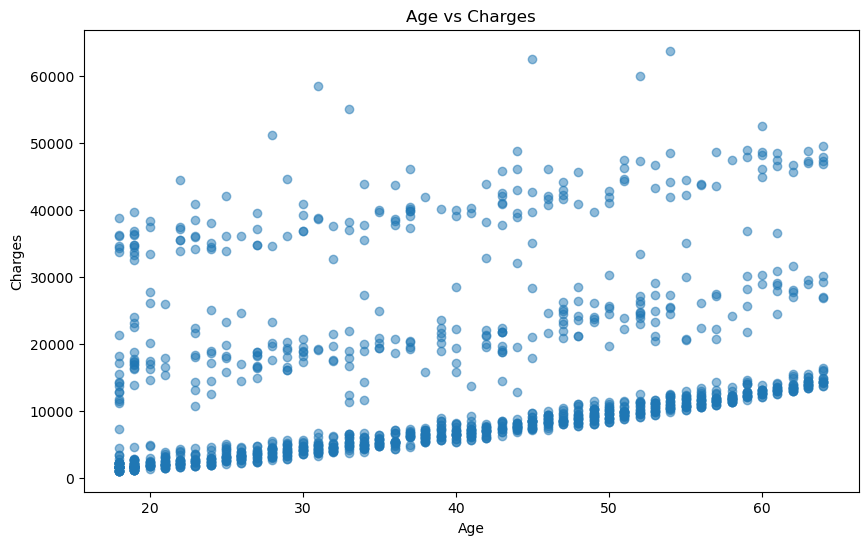


Random Forest Regressor:
Mean Squared Error: 21073365.415079337
R2 Score: 0.8642606273649586

Linear Regression:
Mean Squared Error: 33635210.43117841
R2 Score: 0.7833463107364538


In [16]:
# EDA (for regression)
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['charges'], alpha=0.5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Step 3: Apply at least 2 algorithms for regression (Training and Testing)
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_reg_pred = rf_regressor.predict(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

# Step 4: Generate at least 2 Evaluation Metrics on each algorithm.
# Random Forest Regressor Evaluation
print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_reg_pred))
print("R2 Score:", r2_score(y_test, rf_reg_pred))

# Linear Regression Evaluation
print("\nLinear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, linear_reg_pred))
print("R2 Score:", r2_score(y_test, linear_reg_pred))

# Step 5: Comparing the results.
# No need for explicit comparison as we have evaluation metrics

# Step 6: Fine Tune the best algorithm.



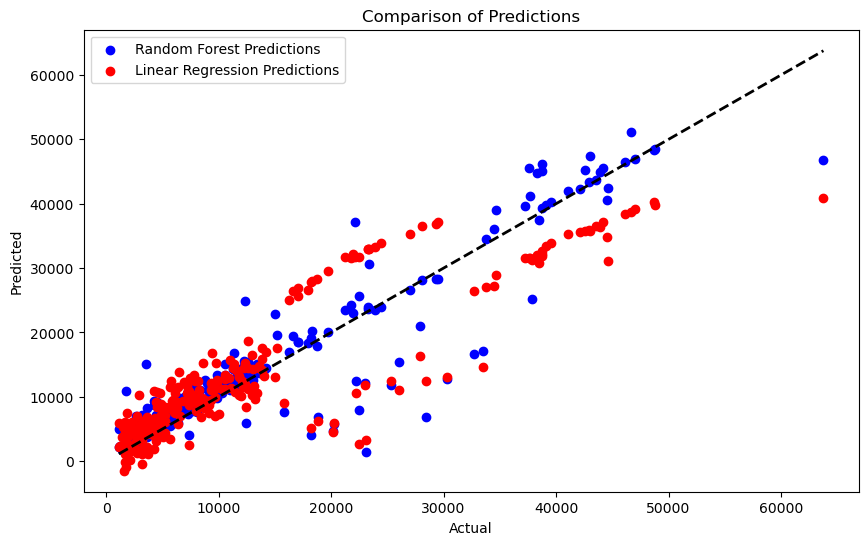

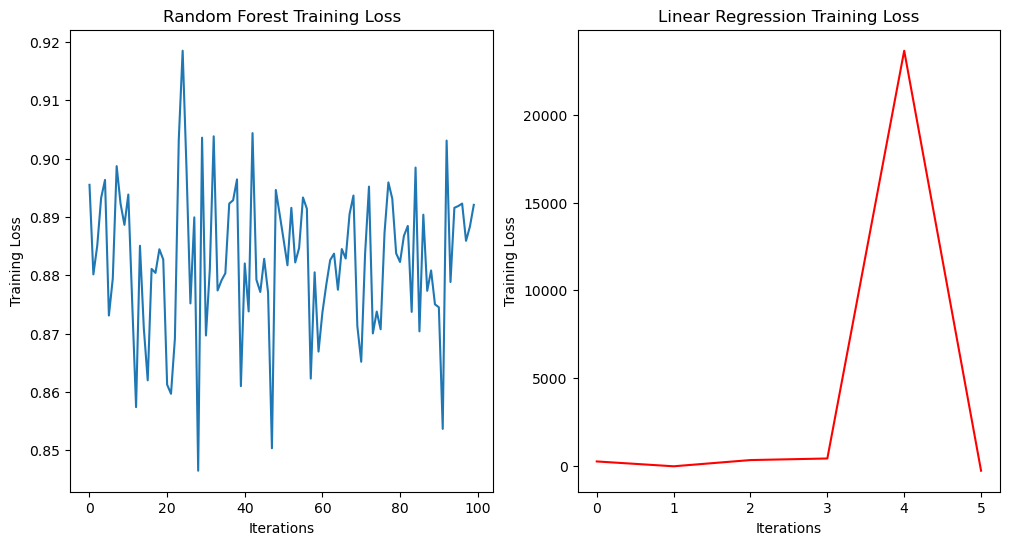

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_reg_pred, color='blue', label='Random Forest Predictions')
plt.scatter(y_test, linear_reg_pred, color='red', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Comparison of Predictions')
plt.legend()
plt.show()

# Loss Graphs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(rf_regressor.estimators_)), [est.score(X_train, y_train) for est in rf_regressor.estimators_], label='Random Forest')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Random Forest Training Loss')

plt.subplot(1, 2, 2)
plt.plot(linear_reg.coef_, label='Linear Regression', color='red')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Linear Regression Training Loss')
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize Grid Search Cross-Validation with Random Forest Regressor
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters and best estimator
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Evaluate the best estimator
best_pred = best_estimator.predict(X_test)
print("\nBest Estimator Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, best_pred))
print("R2 Score:", r2_score(y_test, best_pred))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best Estimator: RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=150, random_state=42)

Best Estimator Evaluation:
Mean Squared Error: 19040773.822679922
R2 Score: 0.8773531117470749
